In [1]:
from utils.load_data import LoadData 
from utils.preprocess import Preprocess
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
load_data = LoadData()
data = load_data.data

features = load_data.features
target = load_data.target

X = data[features]
y = data[target]


Data lost:  31


In [3]:
data.head()

,year,month,day,week_day,consumo_max_diario,prod_e,prod_l,Consumo Vivix,MWh/dia,boosting,cor,espessura,extracao_forno,porcentagem_caco,_merge,crossed_threshold
0,2023,1,1,6,4.6752,0.0,0.0,105120.0,4.3800,0.0,incolor,10.0,651.623752,10.005774,both,0
1,2023,1,2,0,5.2920,0.0,0.0,111722.4,4.6551,0.0,incolor,8.0,649.535068,10.007158,both,0
2,2023,1,3,1,5.5176,1.0,0.0,111208.8,4.6337,0.0,incolor,8.0,647.888229,10.001725,both,0
3,2023,1,4,2,5.1648,0.0,0.0,109924.8,4.5802,0.0,incolor,8.0,647.669957,10.005096,both,0
4,2023,1,5,3,4.8600,0.0,0.0,110587.2,4.6078,0.0,incolor,8.0,647.762743,10.003663,both,0


In [4]:
# create preprocess object
numerical_features = load_data.numerical_features
categorical_features = load_data.categorical_features
boolean_features = load_data.boolean_features
preprocess = Preprocess(categorical_features=categorical_features,
                         numerical_features=numerical_features,
                           boolean_features=boolean_features)

# create the preprocess pipeline
preprocess.create_preprocessor(scale_minmax=False, scale_std=False)

# Since we are not scaling the data, we can fit the preprocess pipeline with all data
# fit the preprocess pipeline
X = preprocess.fit_transform(X)

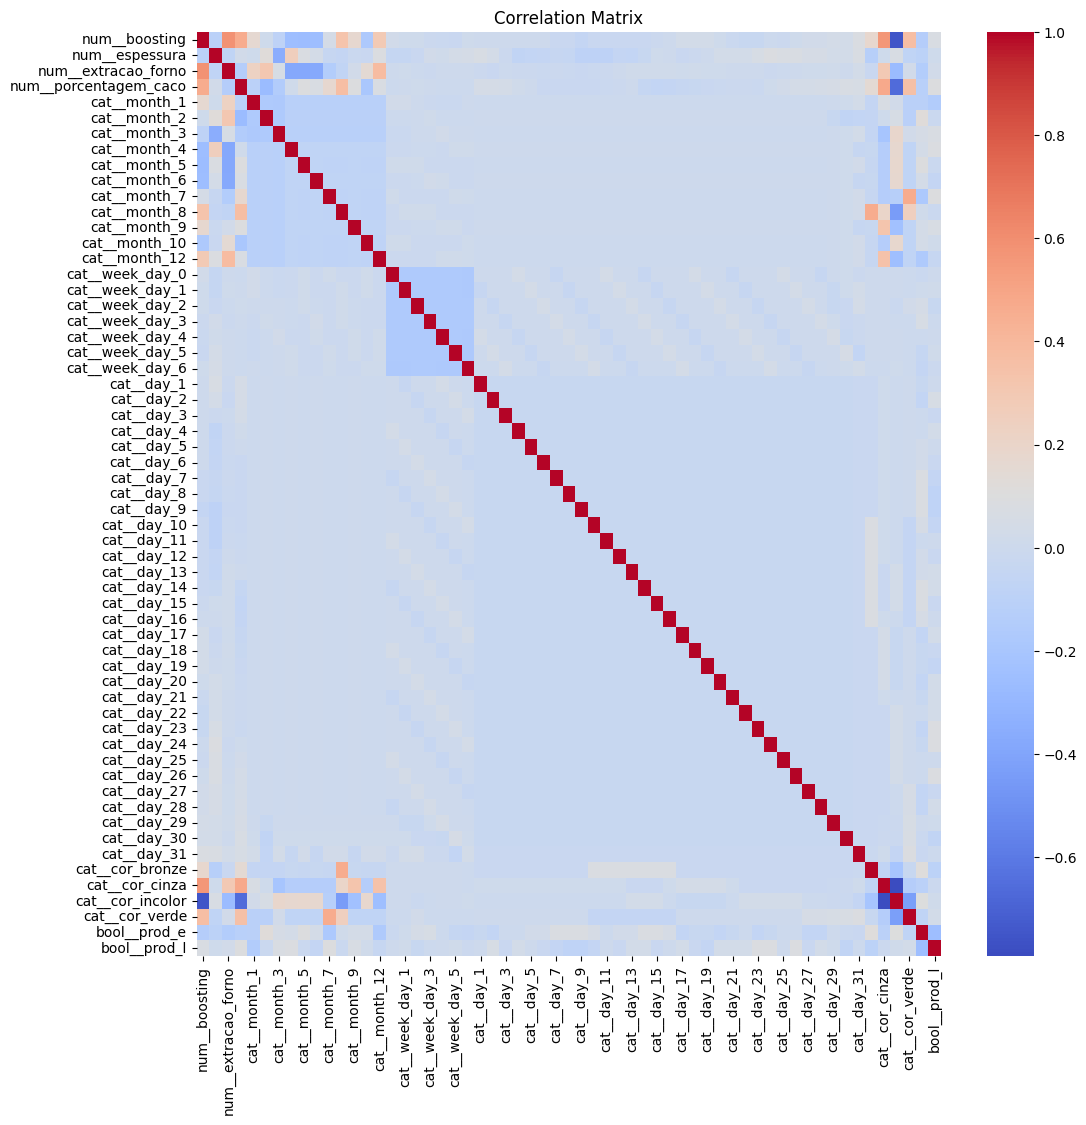

In [5]:
# Reconstruction of the data to a DataFrame
X_df = pd.DataFrame(X, columns=preprocess.features)

# Obtaining the correlation matrix
correlation_matrix = X_df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

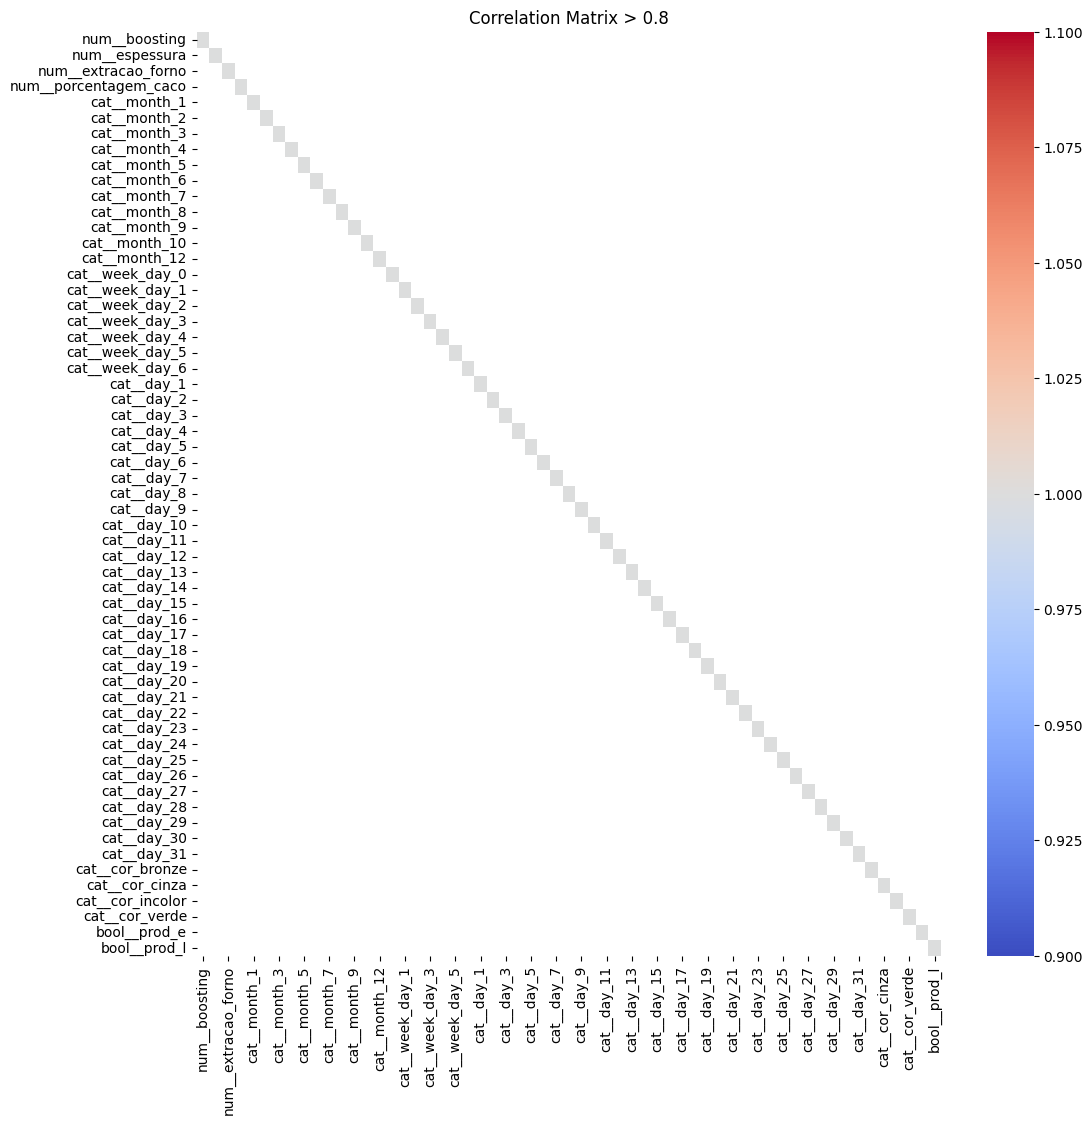

In [6]:
## Showing only the correlation values above 0.8
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix[correlation_matrix > 0.8], annot=False, cmap='coolwarm')
plt.title('Correlation Matrix > 0.8')
plt.show()

None of our feature columns are highly correlated to another. 

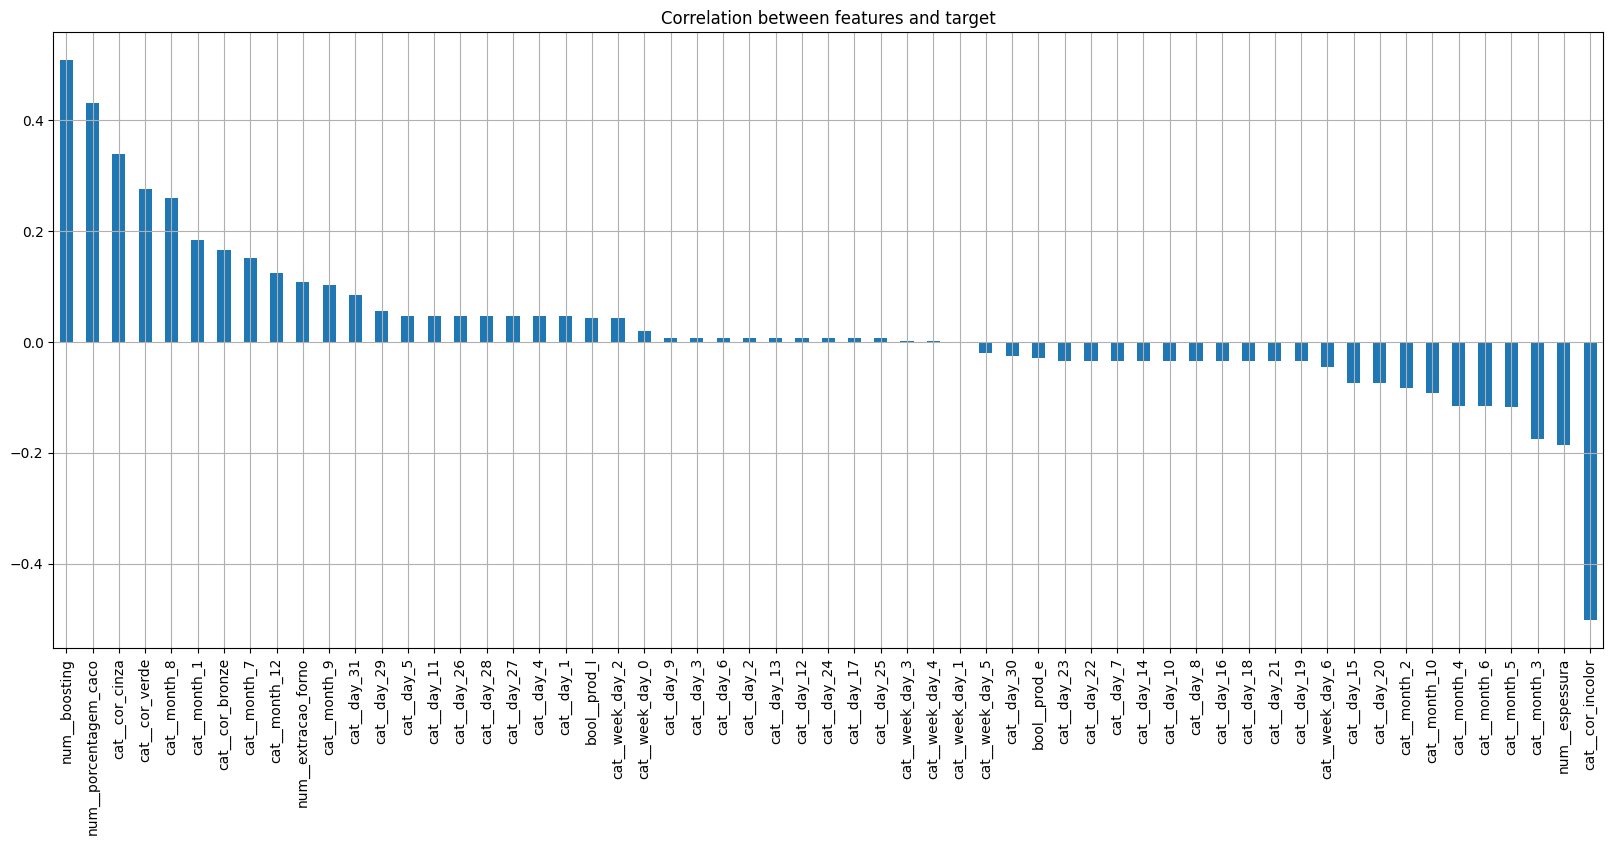

In [7]:
# See if there a correlation between the features and the target
correlation_target = X_df.corrwith(y)
correlation_target = correlation_target.sort_values(ascending=False)

# Plotting the correlation between the features and the target
plt.figure(figsize=(20, 8))
correlation_target.plot(kind='bar')
plt.title('Correlation between features and target')
plt.grid()
plt.show()

In [8]:
describe = X_df.describe()

In [9]:
stats = describe.loc[['min', '25%', '50%', '75%', 'max']]

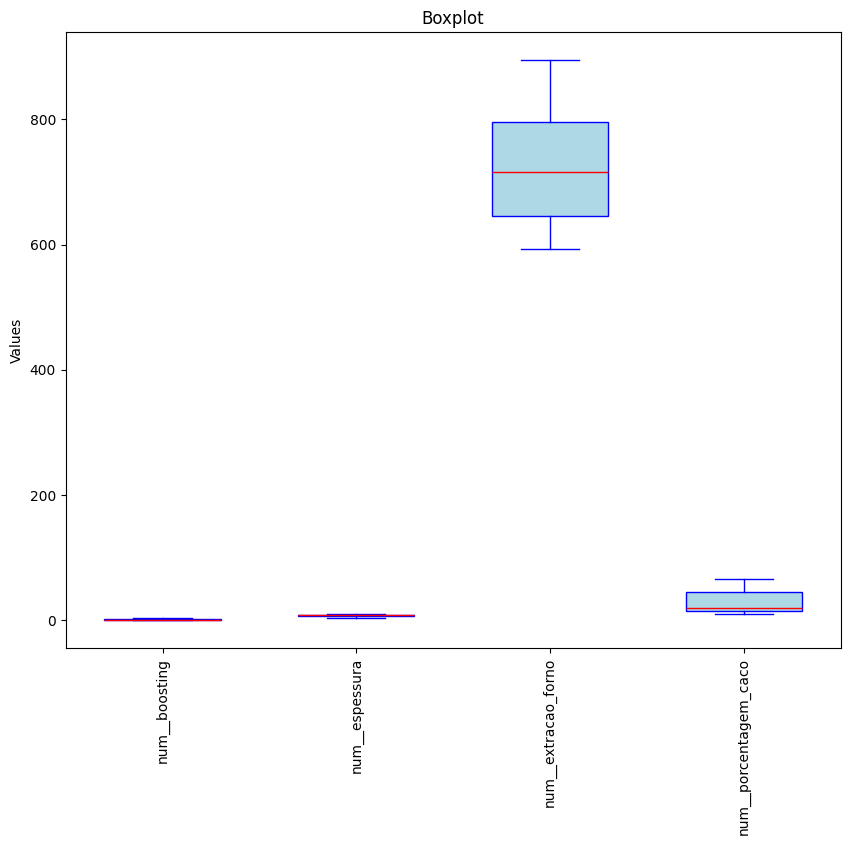

In [10]:
fig, ax = plt.subplots(figsize=(10, 8))

# Plot a boxplot for each column
for i, column in enumerate(preprocess.numerical_features):
    data = stats[column]
    ax.boxplot(
        [data['min'], data['25%'], data['50%'], data['75%'], data['max']],
        positions=[i],
        widths=0.6,
        patch_artist=True,
        boxprops=dict(facecolor='lightblue', color='blue'),
        medianprops=dict(color='red'),
        whiskerprops=dict(color='blue'),
        capprops=dict(color='blue')
    )


ax.set_xticks(range(len(preprocess.numerical_features)))
ax.set_xticklabels(preprocess.numerical_features, rotation=90)
ax.set_title('Boxplot')
ax.set_ylabel('Values')
plt.show()

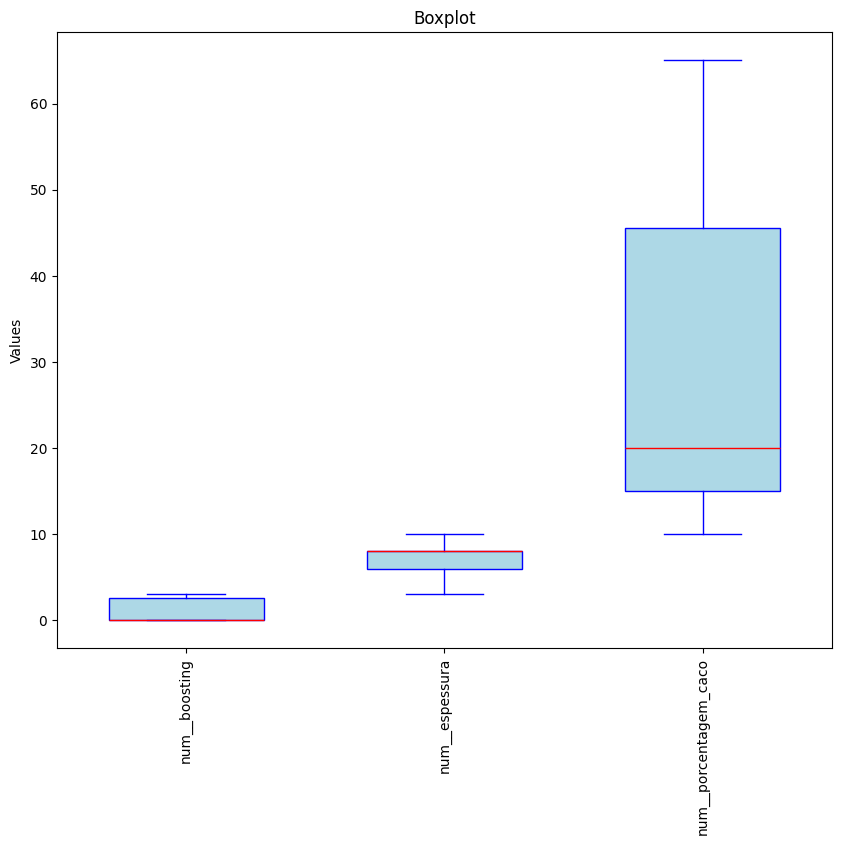

In [11]:
fig, ax = plt.subplots(figsize=(10, 8))

list_without_extracao_forno = preprocess.numerical_features.copy()
list_without_extracao_forno.remove('num__extracao_forno')

# Plot a boxplot for each column
for i, column in enumerate(list_without_extracao_forno):
    data = stats[column]
    ax.boxplot(
        [data['min'], data['25%'], data['50%'], data['75%'], data['max']],
        positions=[i],
        widths=0.6,
        patch_artist=True,
        boxprops=dict(facecolor='lightblue', color='blue'),
        medianprops=dict(color='red'),
        whiskerprops=dict(color='blue'),
        capprops=dict(color='blue')
    )


ax.set_xticks(range(len(list_without_extracao_forno)))
ax.set_xticklabels(list_without_extracao_forno, rotation=90)
ax.set_title('Boxplot')
ax.set_ylabel('Values')
plt.show()

## Principal Component Analysis

In [ ]:
#import pandas as pd
#from sklearn.preprocessing import StandardScaler
#from sklearn.decomposition import PCA
#import matplotlib.pyplot as plt
#
## Suponha que df seja o seu DataFrame
## df = pd.read_csv('seu_arquivo.csv')  # Carregar os dados, se necessário
#
## Separar as variáveis independentes (X)
#X = df.drop(columns=['target'])  # Substitua 'target' pelo nome da sua variável alvo, se houver
#
## Padronizar os dados
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)
#
## Aplicar o PCA
#pca = PCA(n_components=2)  # Substitua n_components pelo número de componentes desejado
#X_pca = pca.fit_transform(X_scaled)
#
## Criar um DataFrame com os componentes principais
#pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
#
## Adicionar a variável alvo ao DataFrame, se houver
#pca_df['target'] = df['target']
#
## Visualizar a variância explicada por cada componente
#explained_variance = pca.explained_variance_ratio_
#print(f'Variância explicada por cada componente: {explained_variance}')
#
#
## Visualizar os componentes principais
#plt.figure(figsize=(10, 8))
#plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['target'], cmap='viridis')
#plt.xlabel('PC1')
#plt.ylabel('PC2')
#plt.title('PCA - Componentes Principais')
#plt.colorbar(label='Target')
#plt.show()